In [30]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
temp_max_df = pd.read_csv('C:/Users/AnalyticsMon/Summer/TEMP_MAX_1.csv', index_col=0)

temp_min_df = pd.read_csv('C:/Users/AnalyticsMon/Summer/TEMP_MIN_1.csv', index_col=0)

display(temp_max_df,temp_min_df)

,Date,TempMax
DATE,,
10-01-2021,10-01-2021,81
10-02-2021,10-02-2021,79
10-03-2021,10-03-2021,74
10-04-2021,10-04-2021,78
10-05-2021,10-05-2021,78
...,...,...
5/23/2022,5/23/2022,87
5/24/2022,5/24/2022,85
5/25/2022,5/25/2022,82


,Date,TempMin
DATE,,
10-01-2021,10-01-2021,43
10-02-2021,10-02-2021,40
10-03-2021,10-03-2021,48
10-04-2021,10-04-2021,54
10-05-2021,10-05-2021,59
...,...,...
5/23/2022,5/23/2022,66
5/24/2022,5/24/2022,61
5/25/2022,5/25/2022,60


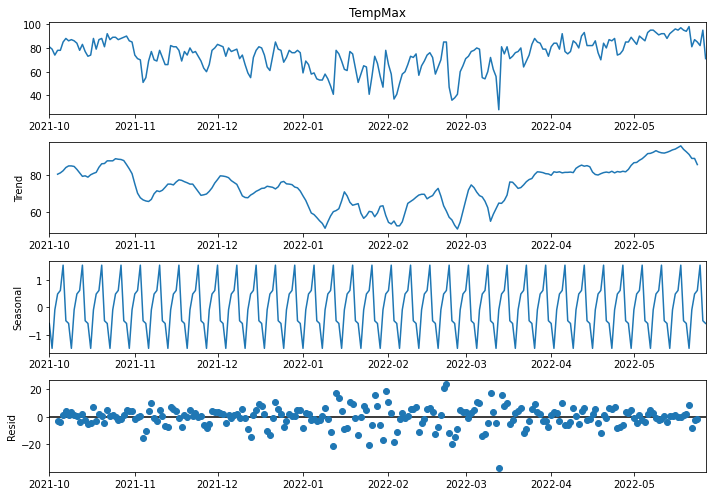

In [31]:
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt
def decompose_time_series(series):
    """
    Decompose a time series and plot it in the console
    Arguments: 
        series: series. Time series that we want to decompose
    Outputs: 
        Decomposition plot in the console
    """
    result = seasonal_decompose(series, model='additive')
    result.plot()
    
    #pyplot.show()
#Execute in the main block
#Convert the Date column into a date object
temp_max_df['Date']=pd.to_datetime(temp_max_df['Date'])
#Set Date as a Pandas DatetimeIndex
temp_max_df.index=pd.DatetimeIndex(temp_max_df['Date'])
#Decompose the time series into parts
plt.rcParams.update({'figure.figsize': (10,7)}) 
decompose_time_series(temp_max_df['TempMax'])



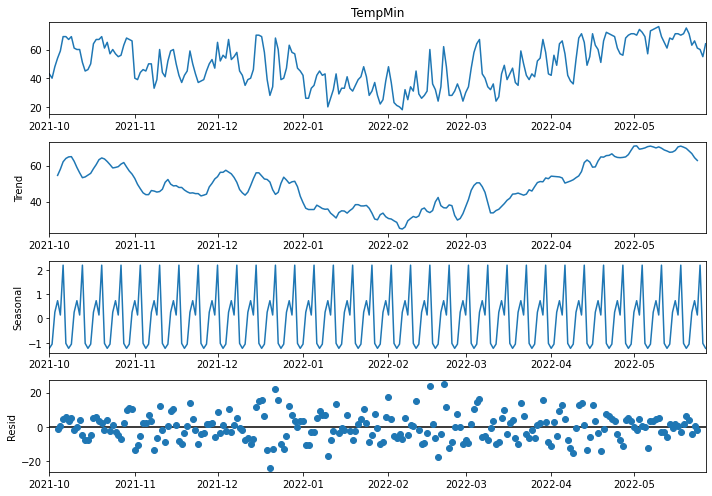

In [32]:
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt
def decompose_time_series(series):
    """
    Decompose a time series and plot it in the console
    Arguments: 
        series: series. Time series that we want to decompose
    Outputs: 
        Decomposition plot in the console
    """
    result = seasonal_decompose(series, model='additive')
    result.plot()
    
    #pyplot.show()
#Execute in the main block
#Convert the Date column into a date object

temp_min_df['Date']=pd.to_datetime(temp_min_df['Date'])
#Set Date as a Pandas DatetimeIndex
temp_min_df.index=pd.DatetimeIndex(temp_min_df['Date'])
#Decompose the time series into parts
plt.rcParams.update({'figure.figsize': (10,7)}) 
decompose_time_series(temp_min_df['TempMin'])

In [33]:
from statsmodels.tsa.ar_model import AutoReg, ar_select_order
from sklearn.metrics import mean_squared_error

In [36]:
max_series = temp_max_df['TempMax']
min_series = temp_min_df['TempMin']

In [43]:
max_historic = max_series.iloc[:int(len(max_series) * 0.3)]
max_test = max_series.iloc[int(len(max_series) * 0.3):]

min_historic = min_series.iloc[:int(len(min_series) * 0.3)]
min_test = min_series.iloc[int(len(min_series) * 0.3):]

In [44]:
type(max_historic)

pandas.core.series.Series

In [45]:
type(min_historic)

pandas.core.series.Series

In [46]:
max_historic = max_historic.to_list()
type(max_historic)

list

In [47]:
min_historic = min_historic.to_list()
type(min_historic)

list

In [48]:
max_predictions = []
for i in range(len(max_test)):
    max_sel = ar_select_order(max_historic, 13, old_names=False)
    max_sel.ar_lags
    max_model_fit = max_sel.model.fit()
    max_pred = max_model_fit.predict(start=len(max_historic), end=len(max_historic), dynamic=False)
    max_predictions.append(max_pred[0])
    max_historic.append(max_test[i])
max_cross_val = pd.Series(max_predictions, index=max_test.index)

In [49]:
min_predictions = []
for i in range(len(min_test)):
    min_sel = ar_select_order(min_historic, 13, old_names=False)
    min_sel.ar_lags
    min_model_fit = min_sel.model.fit()
    min_pred = min_model_fit.predict(start=len(min_historic), end=len(min_historic), dynamic=False)
    min_predictions.append(min_pred[0])
    min_historic.append(min_test[i])
min_cross_val = pd.Series(min_predictions, index=min_test.index)

In [50]:
max_test_score = mean_squared_error(max_test, max_cross_val, squared = False)
#squared: bool, default=True
#If True returns MSE value, if False returns RMSE value.
print(max_test_score)

9.892996037475601


In [53]:
min_test_score = mean_squared_error(min_test, min_cross_val, squared = False)
#squared: bool, default=True
#If True returns MSE value, if False returns RMSE value.
print(min_test_score)

9.569202810085237


In [54]:
type(max_cross_val)

pandas.core.series.Series

In [55]:
type(min_cross_val)

pandas.core.series.Series

In [56]:
max_cross_val.head()

Date
2021-12-11    74.977634
2021-12-12    68.986498
2021-12-13    63.306574
2021-12-14    59.542105
2021-12-15    73.234953
dtype: float64

In [57]:
min_cross_val.head()

Date
2021-12-11    45.701659
2021-12-12    40.591678
2021-12-13    43.244841
2021-12-14    43.812753
2021-12-15    48.015979
dtype: float64

In [58]:
max_test

Date
2021-12-11    66
2021-12-12    59
2021-12-13    55
2021-12-14    72
2021-12-15    78
              ..
2022-05-23    87
2022-05-24    85
2022-05-25    82
2022-05-26    95
2022-05-27    71
Name: TempMax, Length: 168, dtype: int64

In [59]:
min_test

Date
2021-12-11    35
2021-12-12    39
2021-12-13    40
2021-12-14    46
2021-12-15    70
              ..
2022-05-23    66
2022-05-24    61
2022-05-25    60
2022-05-26    55
2022-05-27    64
Name: TempMin, Length: 168, dtype: int64

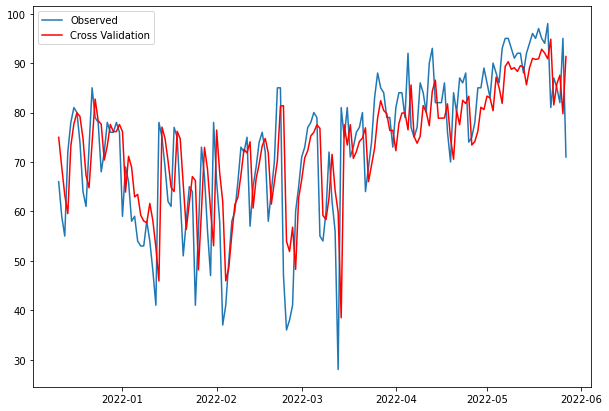

In [60]:
#Plot for temp. max data
plt.plot(max_test, label='Observed')
plt.plot(max_cross_val, color='red', label='Cross Validation')
plt.legend()
plt.show()

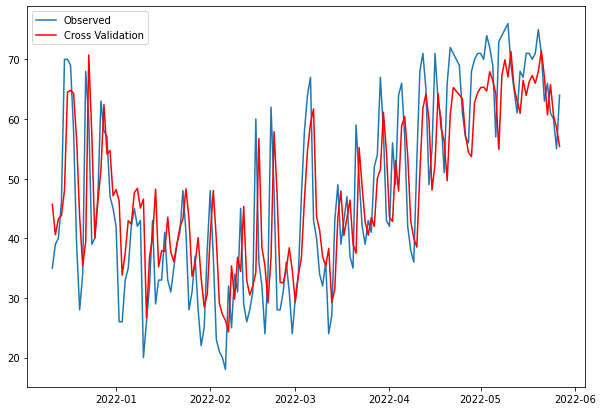

In [62]:
#Plot for temp. min data
plt.plot(min_test, label='Observed')
plt.plot(min_cross_val, color='red', label='Cross Validation')
plt.legend()
plt.show()

In [79]:
max_historic = max_series
#prediction for the next 52 weeks (1 year)
max_pred = 52
#the future weeks starts on 2018-10-07, because the last existing data ends on 2018-09-30
max_date_pred = pd.date_range("2022-05-27", periods=max_pred, freq="w")

max_sel = ar_select_order(max_historic, 13, glob = True, seasonal = True, old_names=False)
max_sel.ar_lags
max_model_fit = max_sel.model.fit()
max_pred = max_model_fit.predict(start=len(max_historic), end=len(max_historic) + max_pred - 1, dynamic=False)
#The predict function requires a start and an end to be specified, these can be the indexes of the time steps 
#relative to the beginning of the training data used to fit the model
#model_fit.plot_predict(start=len(historic), end=len(historic) + len(test))

C:\Users\yoges\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\yoges\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


In [80]:
max_predictions = pd.Series(max_pred.values, index=max_date_pred)

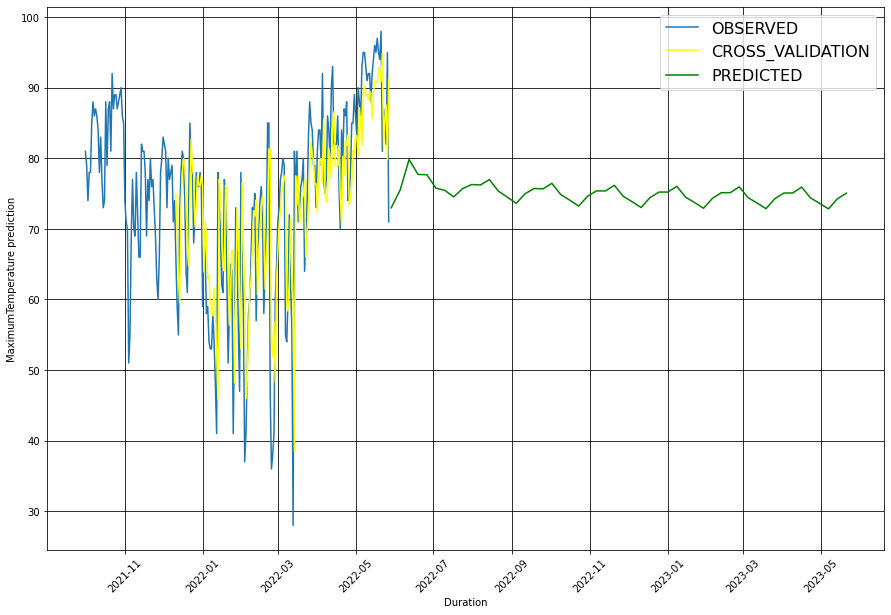

In [93]:
# Temp_max plot results
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 10))
plt.xlabel("Duration")
plt.ylabel("MaximumTemperature prediction")
plt.plot(max_series, label='OBSERVED')
plt.plot(max_cross_val, color='yellow', label='CROSS_VALIDATION')
plt.plot(max_predictions, color='green', label='PREDICTED')
plt.legend(fontsize = 16)

plt.xticks(rotation=45)
plt.grid(color='k', linestyle='-')
plt.plot(marker='D', mfc='red', markersize=10, color='b', linestyle='dashed', linewidth=3)
plt.show()
plt.show()

In [94]:
min_historic = min_series
#prediction for the next 52 weeks (1 year)
min_pred = 64
#the future weeks starts on 2018-10-07, because the last existing data ends on 2018-09-30
min_date_pred = pd.date_range("2022-05-27", periods=min_pred, freq="w")

min_sel = ar_select_order(min_historic, 13, glob = True, seasonal = True, old_names=False)
min_sel.ar_lags
min_model_fit = min_sel.model.fit()
min_pred = min_model_fit.predict(start=len(min_historic), end=len(min_historic) + min_pred - 1, dynamic=False)
#The predict function requires a start and an end to be specified, these can be the indexes of the time steps 
#relative to the beginning of the training data used to fit the model
#model_fit.plot_predict(start=len(historic), end=len(historic) + len(test))

C:\Users\yoges\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\yoges\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


In [95]:
min_predictions = pd.Series(min_pred.values, index=min_date_pred)

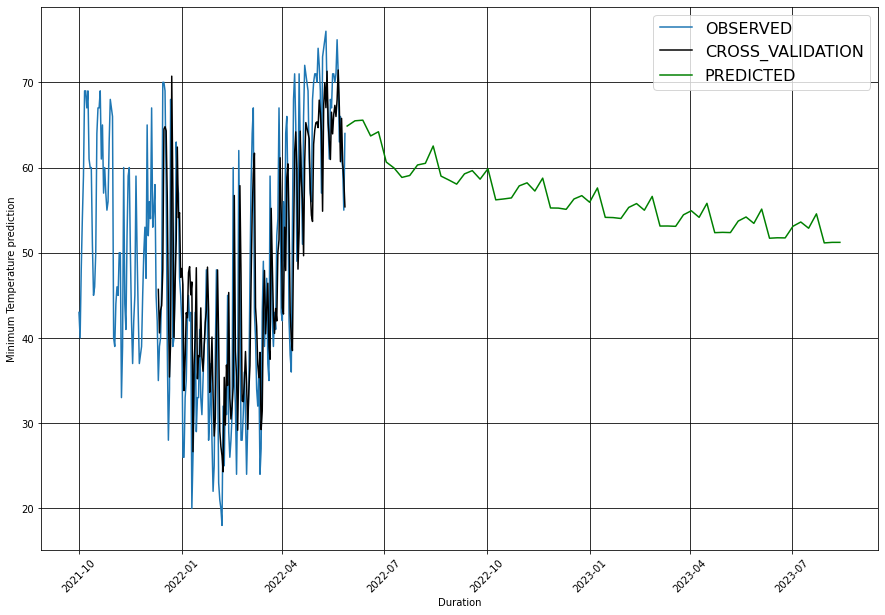

In [96]:
# Temp_min plot results
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 10))
plt.xlabel("Duration")
plt.ylabel("Minimum Temperature prediction")
plt.plot(min_series, label='OBSERVED')
plt.plot(min_cross_val, color='black', label='CROSS_VALIDATION')
plt.plot(min_predictions, color='Green', label='PREDICTED')
plt.legend(fontsize = 16)

plt.xticks(rotation=45)
plt.grid(color='k', linestyle='-')
plt.plot(marker='D', mfc='red', markersize=10, color='b', linestyle='dashed', linewidth=3)
plt.show()